In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
test_accuracy = np.load("ResNet/ResNet_test_accuracy.npy")
train_accuracy = np.load("ResNet/ResNet_train_accuracy.npy")

test_loss = np.load("ResNet/ResNet_test_loss.npy")
train_loss = np.load("ResNet/ResNet_train_loss.npy")

In [ ]:
test_accuracy.shape, train_accuracy.shape

In [ ]:
def draw_line(data, color, label):
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    plt.fill_between(np.arange(test_accuracy.shape[1]), mean+std, mean-std, alpha=.5, color=color)
    plt.plot(mean, color=color, label=label)
    plt.scatter(np.arange(test_accuracy.shape[1]), mean, color=color)


In [ ]:
draw_line(test_accuracy, 'C0', 'Test')
draw_line(train_accuracy, 'C1', 'Train')

plt.title("Accuracy learning curve ResNet50")
plt.ylim((.4, 1.))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Accuracy learning curve ResNet50")

In [ ]:
draw_line(test_loss, 'C0', 'Test')
draw_line(train_loss, 'C1', 'Train')

plt.title("Loss learning curve ResNet50")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Loss learning curve ResNet50")

In [ ]:
test_accuracy_mobile = np.load("MobileNetV2/MobileNetV2_test_accuracy.npy")
train_accuracy_mobile = np.load("MobileNetV2/MobileNetV2_train_accuracy.npy")

test_loss_mobile = np.load("MobileNetV2/MobileNetV2_test_loss.npy")
train_loss_mobile = np.load("MobileNetV2/MobileNetV2_train_loss.npy")

In [ ]:
draw_line(test_accuracy_mobile, 'C0', 'Test')
draw_line(train_accuracy_mobile, 'C1', 'Train')

plt.title("Accuracy learning curve MobileNetV2")
plt.ylim((.4, 1.))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Accuracy learning curve MobileNetV2")

In [ ]:
draw_line(test_loss_mobile, 'C0', 'Test')
draw_line(train_loss_mobile, 'C1', 'Train')

plt.title("Loss learning curve MobileNetV2")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Loss learning curve MobileNetV2")

In [111]:
import dataset
import torchvision.transforms as transforms


transform = transforms.Compose([
    # to-tensor
    transforms.ToTensor(),
    # resize
    transforms.Resize(128),
    # center-crop
    transforms.CenterCrop(128),
    # normalize
    # transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
])

incidents = dataset.IncidentsDataset("Incidents-subset", transform=transform)

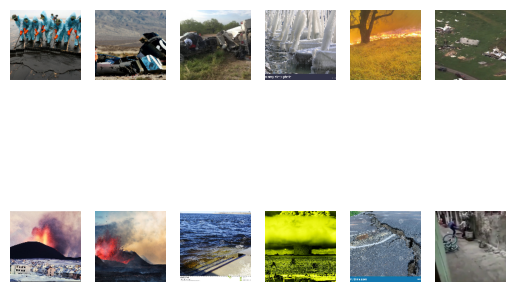

In [113]:
fig, axs = plt.subplots(2, 6)

for i in range(2):
    for j in range(6):
        img = incidents.get_item_with_target(i*6+j, 0)
        img = np.transpose(img, (1, 2, 0))
        axs[i, j].imshow(img)
        axs[i, j].axis('off')



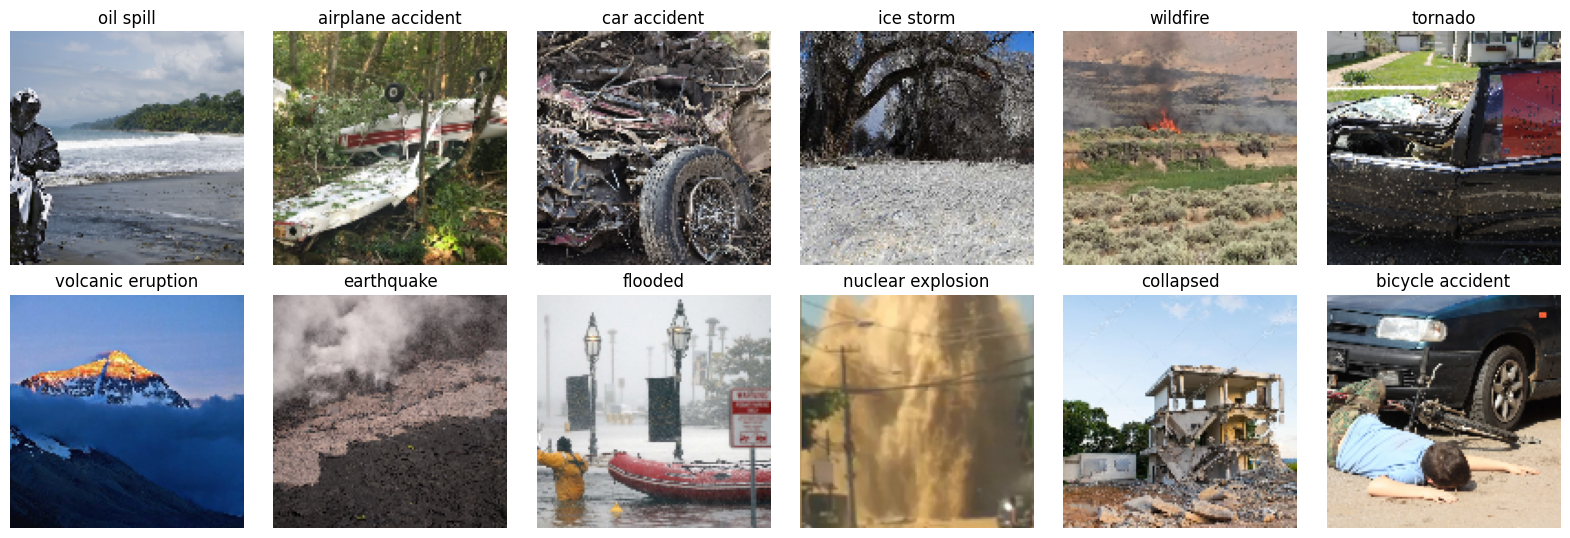

In [120]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 6), axes_pad=(.3, .3))

images = []

for i in range(2):
    for j in range(6):
        idx = i*6+j
        img = incidents.get_item_with_target(idx, 1)
        grid[idx].imshow(img.permute(1, 2, 0))
        grid[idx].set_title(incidents.labels[idx])
        grid[idx].axis('off')

plt.savefig('figures/example_images')

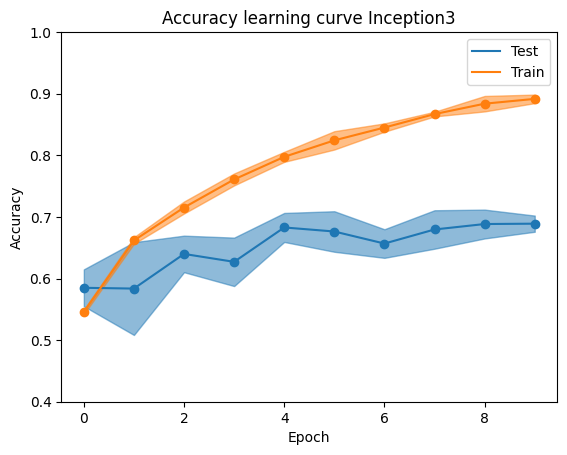

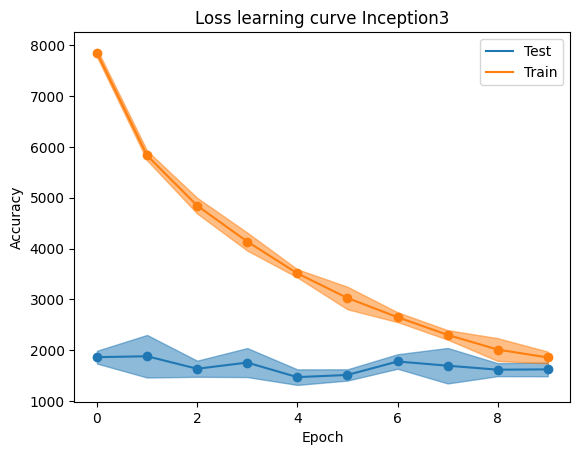

In [122]:
test_accuracy_mobile = np.load("Inception3/Inception3_test_accuracy.npy")
train_accuracy_mobile = np.load("Inception3/Inception3_train_accuracy.npy")

test_loss_mobile = np.load("Inception3/Inception3_test_loss.npy")
train_loss_mobile = np.load("Inception3/Inception3_train_loss.npy")

plt.figure()
draw_line(test_accuracy_mobile, 'C0', 'Test')
draw_line(train_accuracy_mobile, 'C1', 'Train')
plt.title("Accuracy learning curve Inception3")
plt.ylim((.4, 1.))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Accuracy learning curve Inception3")

plt.figure()
draw_line(test_loss_mobile, 'C0', 'Test')
draw_line(train_loss_mobile, 'C1', 'Train')

plt.title("Loss learning curve Inception3")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("figures/Loss learning curve Inception3")